## **Loading Data set**

In [ ]:
# importing libraries for loading and working with dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# reading our dataset into a pandas data frame
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projects/Stock Forcast/sp500_data.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2010-01-26,7.355357,7.632500,7.235000,7.355000,6.218305,1867110000,AAPL
1,2010-01-27,7.387500,7.520714,7.126071,7.424286,6.276883,1722568400,AAPL
2,2010-01-28,7.318929,7.339286,7.096429,7.117500,6.017510,1173502400,AAPL
3,2010-01-29,7.181429,7.221429,6.794643,6.859286,5.799201,1245952400,AAPL
4,2010-02-01,6.870357,7.000000,6.832143,6.954643,5.879823,749876400,AAPL


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9706 entries, 0 to 9705
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9706 non-null   object 
 1   Open       9706 non-null   float64
 2   High       9706 non-null   float64
 3   Low        9706 non-null   float64
 4   Close      9706 non-null   float64
 5   Adj Close  9706 non-null   float64
 6   Volume     9706 non-null   int64  
 7   Ticker     9706 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 606.8+ KB


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9706.000000,9706.000000,9706.000000,9706.000000,9706.000000,9.706000e+03
mean,56.741912,57.600768,55.814545,56.725588,55.965397,1.457776e+08
std,68.798232,70.119342,67.332399,68.732751,68.815465,1.598679e+08
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,13.853018,14.056553,13.664666,13.845167,13.371333,6.226612e+07
50%,23.843750,24.145715,23.545000,23.826500,22.628252,9.286750e+07
75%,81.675375,82.892498,80.723751,81.820000,81.661623,1.550838e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,1.880998e+09


In [ ]:

data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')
data.set_index('Date', inplace=True)

##**Analysis**

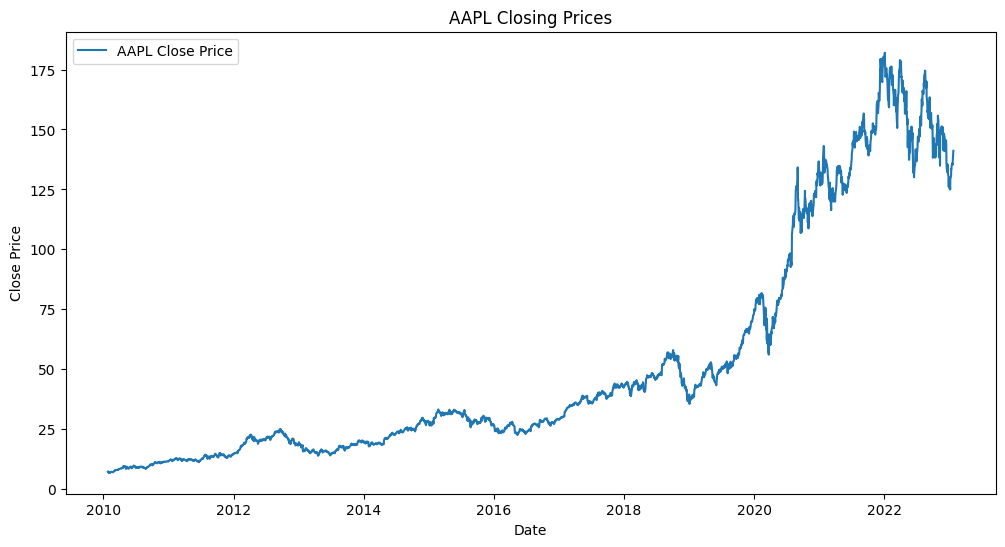

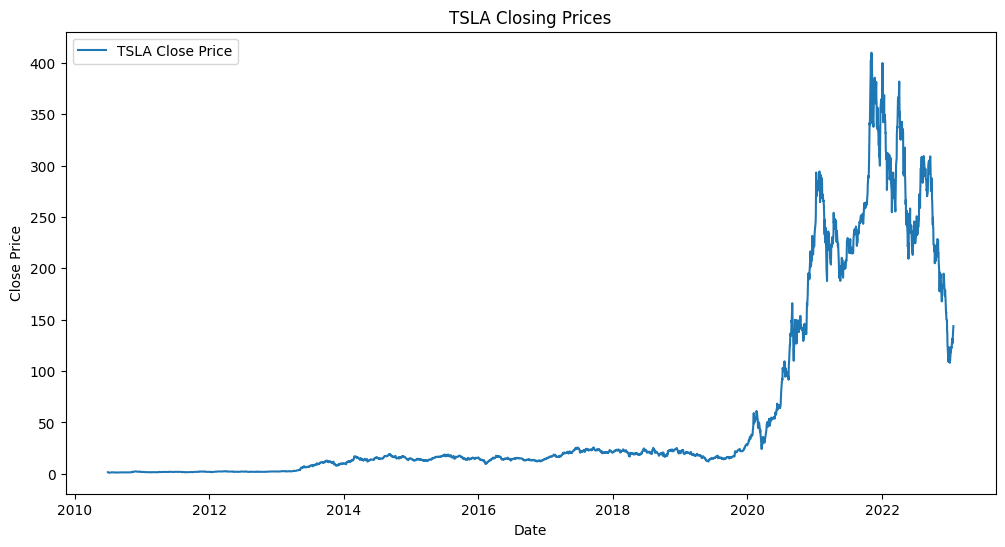

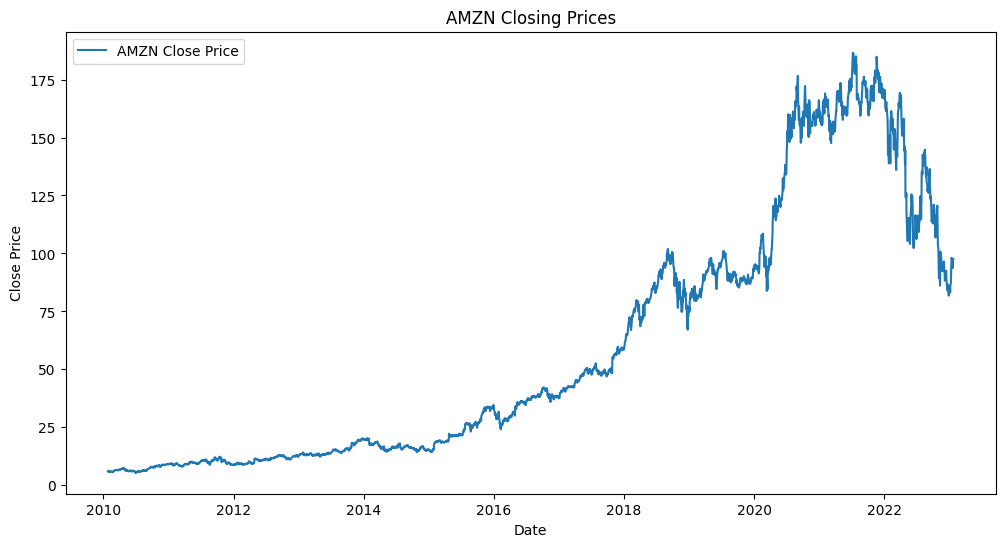

In [ ]:
# Filter data for each ticker
tickers = ['AAPL', 'TSLA', 'AMZN']

for ticker in tickers:
    ticker_data = data[data['Ticker'] == ticker]
    plt.figure(figsize=(12, 6))
    plt.plot(ticker_data['Close'], label=f'{ticker} Close Price')
    plt.title(f'{ticker} Closing Prices')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

In [ ]:
# Augmented Dickey Fuller Test

from statsmodels.tsa.stattools import adfuller

for ticker in tickers:
    ticker_data = data[data['Ticker'] == ticker]
    result = adfuller(ticker_data['Close'])
    print(f'{ticker} ADF Statistic:', result[0])
    print(f'{ticker} p-value:', result[1])
    print(f'{ticker} Critical Values:', result[4])
    if result[1] > 0.05:
        print(f"{ticker} time series is non-stationary.")
    else:
        print(f"{ticker} time series is stationary.")


AAPL ADF Statistic: 0.01560258201629856
AAPL p-value: 0.9598035449927741
AAPL Critical Values: {'1%': -3.4323649247638532, '5%': -2.862430273204085, '10%': -2.5672439115886396}
AAPL time series is non-stationary.
TSLA ADF Statistic: -1.2720592522218137
TSLA p-value: 0.6418563500861515
TSLA Critical Values: {'1%': -3.432438278296661, '5%': -2.8624626723247393, '10%': -2.567261160273982}
TSLA time series is non-stationary.
AMZN ADF Statistic: -0.9353032772666086
AMZN p-value: 0.77612439401693
AMZN Critical Values: {'1%': -3.432368033803368, '5%': -2.8624316464349073, '10%': -2.5672446426683}
AMZN time series is non-stationary.


For all three tickers (AAPL, TSLA, and AMZN), the ADF test results indicate that the time series are non-stationary. This means that the statistical properties of these time series, such as mean and variance, change over time.

<ipython-input-8-9e9c5aea3898>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data['MA_50'] = ticker_data['Close'].rolling(window=50).mean()
<ipython-input-8-9e9c5aea3898>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data['MA_200'] = ticker_data['Close'].rolling(window=200).mean()


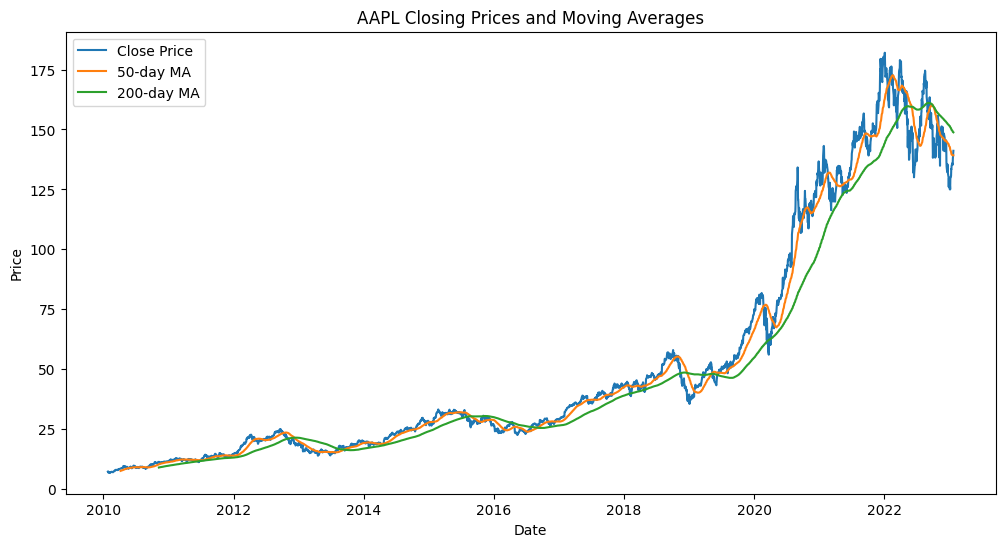

<ipython-input-8-9e9c5aea3898>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data['MA_50'] = ticker_data['Close'].rolling(window=50).mean()
<ipython-input-8-9e9c5aea3898>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data['MA_200'] = ticker_data['Close'].rolling(window=200).mean()


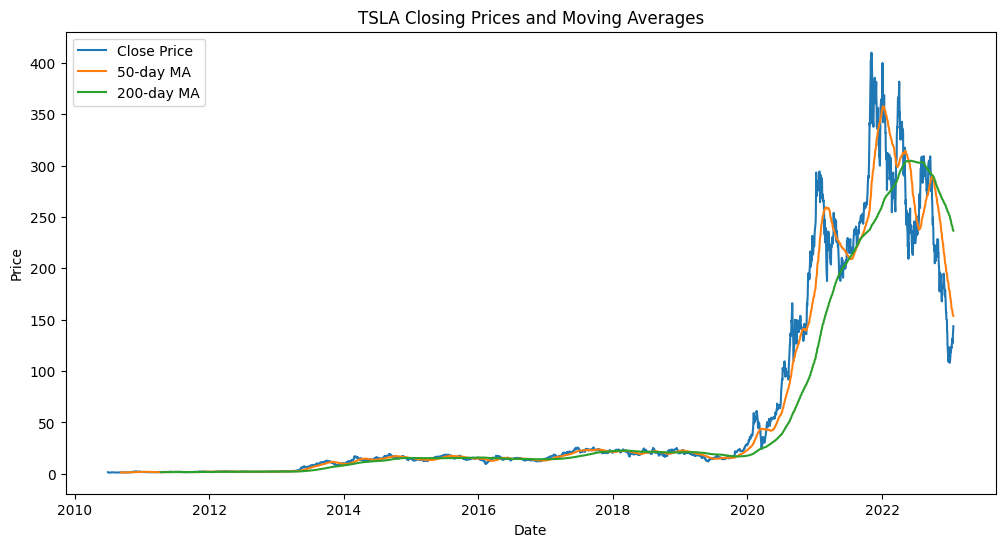

<ipython-input-8-9e9c5aea3898>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data['MA_50'] = ticker_data['Close'].rolling(window=50).mean()
<ipython-input-8-9e9c5aea3898>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data['MA_200'] = ticker_data['Close'].rolling(window=200).mean()


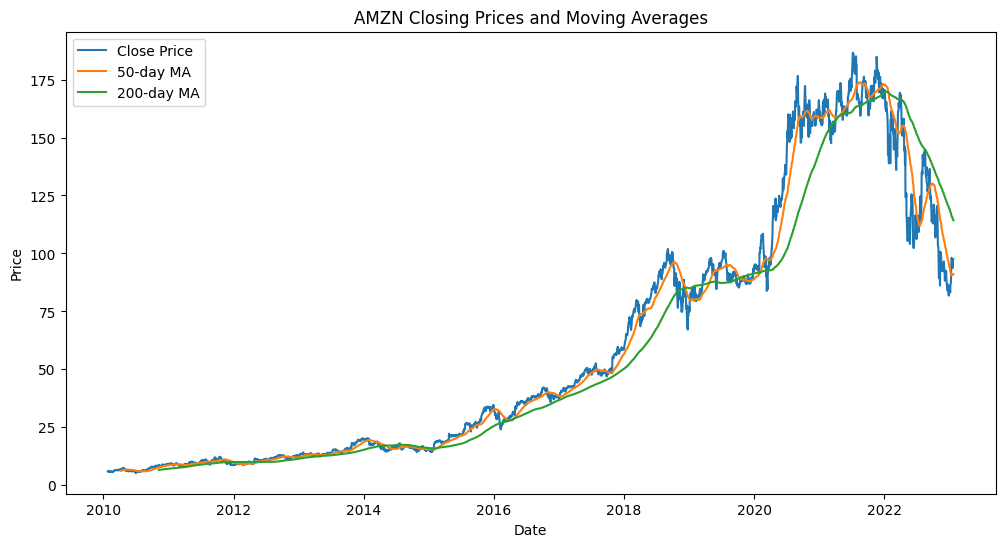

In [ ]:
# closing price and moving averages

for ticker in tickers:
    ticker_data = data[data['Ticker'] == ticker]
    ticker_data['MA_50'] = ticker_data['Close'].rolling(window=50).mean()
    ticker_data['MA_200'] = ticker_data['Close'].rolling(window=200).mean()

    plt.figure(figsize=(12, 6))
    plt.plot( ticker_data['Close'], label='Close Price')
    plt.plot( ticker_data['MA_50'], label='50-day MA')
    plt.plot( ticker_data['MA_200'], label='200-day MA')
    plt.title(f'{ticker} Closing Prices and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

<ipython-input-9-0efd85c2c5c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data['Daily_Return'] = ticker_data['Close'].pct_change()


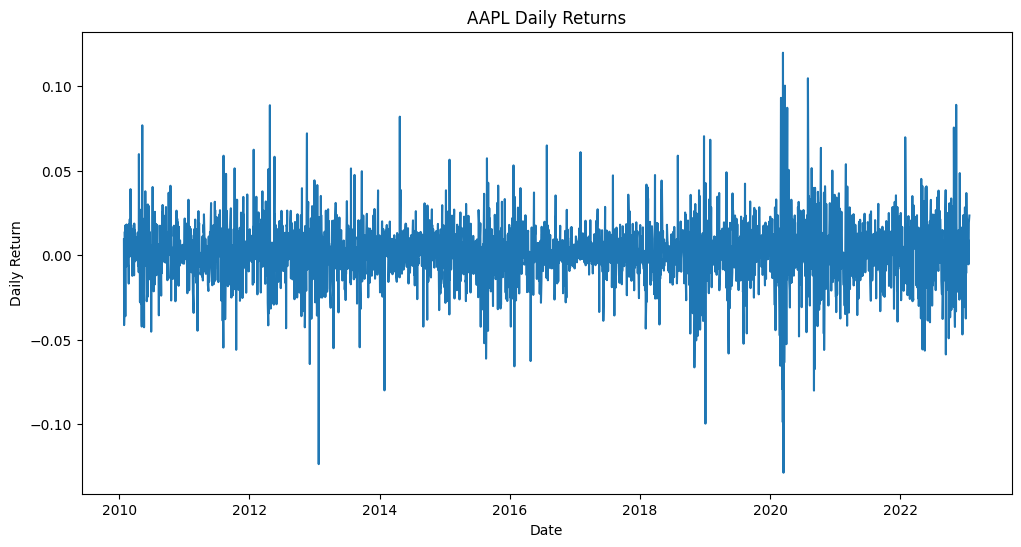

<ipython-input-9-0efd85c2c5c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data['Daily_Return'] = ticker_data['Close'].pct_change()


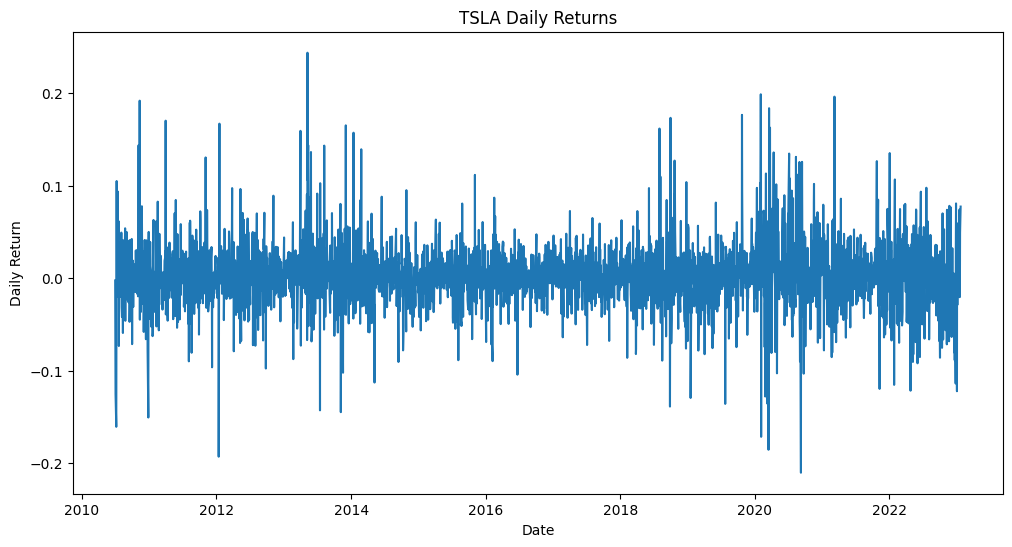

<ipython-input-9-0efd85c2c5c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data['Daily_Return'] = ticker_data['Close'].pct_change()


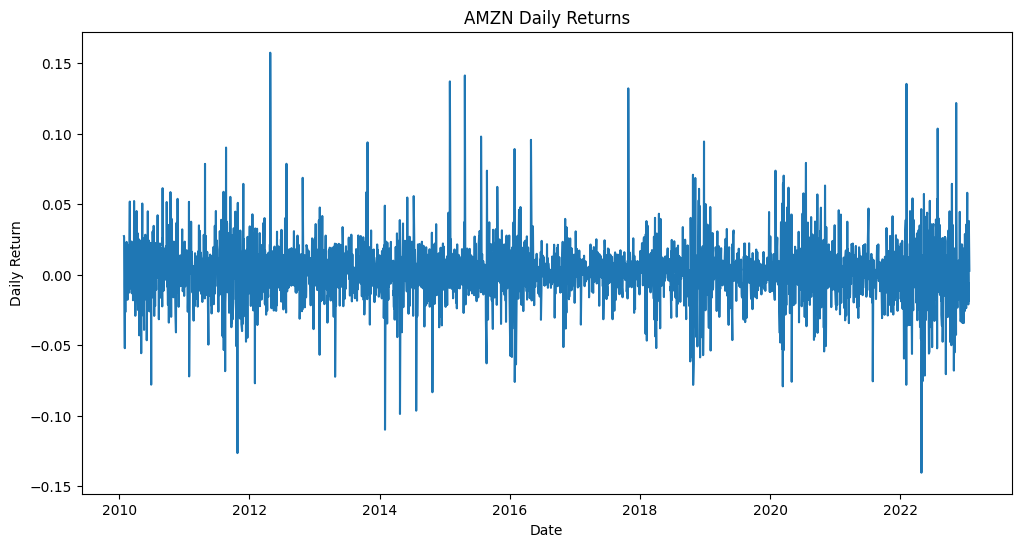

In [ ]:
for ticker in tickers:
    ticker_data = data[data['Ticker'] == ticker]
    ticker_data['Daily_Return'] = ticker_data['Close'].pct_change()

    plt.figure(figsize=(12, 6))
    plt.plot(ticker_data['Daily_Return'])
    plt.title(f'{ticker} Daily Returns')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.show()


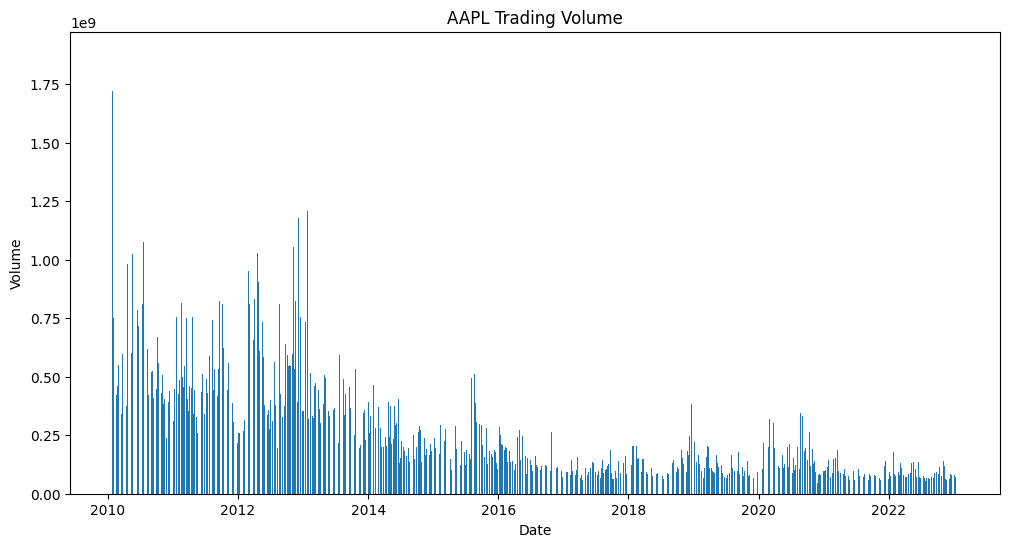

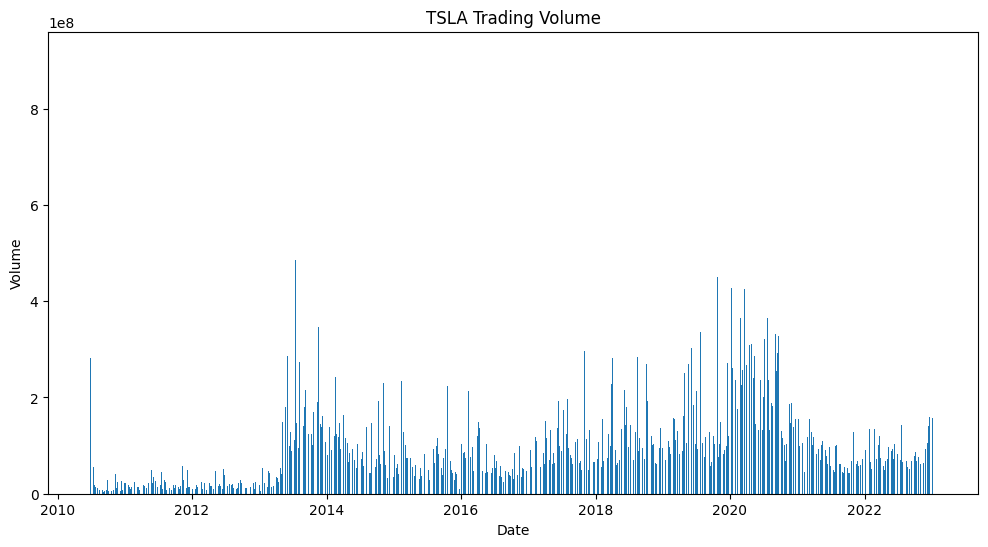

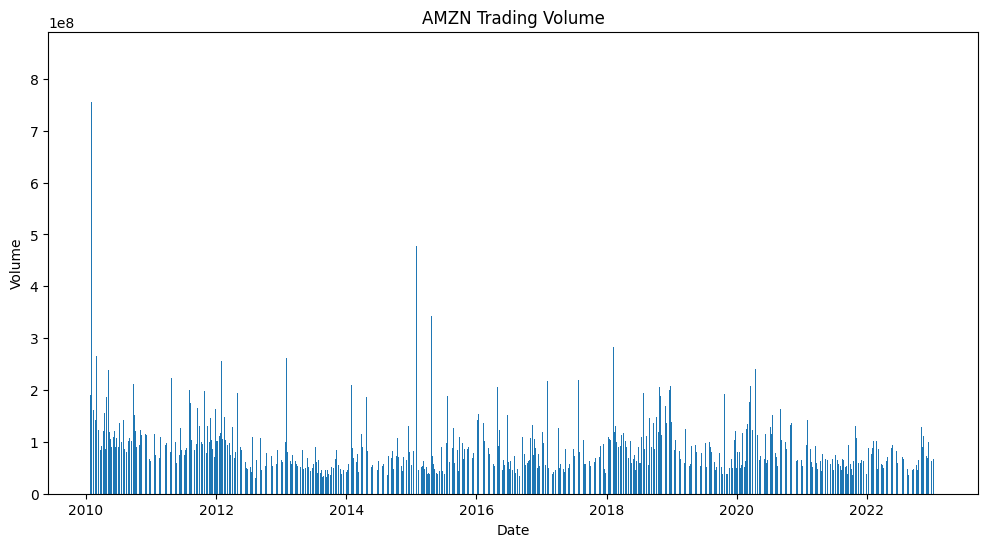

In [ ]:
# observing trading volumes over the years

for ticker in tickers:
    ticker_data = data[data['Ticker'] == ticker]
    plt.figure(figsize=(12, 6))
    plt.bar(ticker_data.index, ticker_data['Volume'])
    plt.title(f'{ticker} Trading Volume')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.show()

## **Model Building**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import pickle

In [ ]:
#preparing dataset for LSTM
look_back =20

def create_dataset(dataset, look_back=20):
  x,y, = [], []
  for i in range(len(dataset) - look_back):
    x.append(dataset[i:(i + look_back), 0])
    y.append(dataset[i + look_back, 0])

  return np.array(x), np.array(y)

In [ ]:
# function to process data, divide data into train-tests and build model

def build_model(ticker, data):
  data = data[data['Ticker'] == ticker]

  # Extract closing prices and reshape
  prices = data['Close'].values.reshape(-1, 1)

  # Normalize the data
  scaler = MinMaxScaler(feature_range=(0, 1))
  scaled_prices = scaler.fit_transform(prices)

  X, Y = create_dataset(scaled_prices, look_back)

  X = np.reshape(X, (X.shape[0], look_back, 1))

  # splitting the data into training and testing
  train_size = int(len(X)*0.7)

  x_train, x_test = X[:train_size], X[train_size:]
  y_train, y_test = Y[:train_size], Y[train_size:]

  print(f"X train shape = {x_train.shape}")
  print(f"X test shape = {x_test.shape}")
  print(f"Y train shape = {y_train.shape}")
  print(f"Y test shape = {y_test.shape}")

  # Build the model
  model = Sequential()
  model.add(LSTM(20, input_shape=(look_back, 1)))
  model.add(Dense(1))
  model.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error")

  history = model.fit(x_train, y_train, epochs=50, batch_size=72, validation_data=(x_test, y_test), shuffle=False)

  # Save the history
  with open(f"{ticker}_history.pkl", 'wb') as file:
    pickle.dump(history.history, file)

  # Plot training & validation loss values
  plt.figure(figsize=(12, 6))
  plt.plot(history.history['loss'], label='Train Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title(f'Model Loss for {ticker}')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  #saving the model
  model.save(f"{ticker}_model.h5")

X train shape = (2275, 20, 1)
X test shape = (976, 20, 1)
Y train shape = (2275,)
Y test shape = (976,)
Epoch 1/50
32/32 [==============================] - 3s 27ms/step - loss: 5.0934e-04 - val_loss: 0.0445
Epoch 2/50
32/32 [==============================] - 0s 5ms/step - loss: 0.0046 - val_loss: 0.0271
Epoch 3/50
32/32 [==============================] - 0s 7ms/step - loss: 0.0014 - val_loss: 6.8857e-04
Epoch 4/50
32/32 [==============================] - 0s 6ms/step - loss: 1.4422e-04 - val_loss: 0.0089
Epoch 5/50
32/32 [==============================] - 0s 6ms/step - loss: 7.3013e-05 - val_loss: 0.0010
Epoch 6/50
32/32 [==============================] - 0s 6ms/step - loss: 5.0756e-05 - val_loss: 0.0013
Epoch 7/50
32/32 [==============================] - 0s 6ms/step - loss: 5.0705e-05 - val_loss: 8.5269e-04
Epoch 8/50
32/32 [==============================] - 0s 6ms/step - loss: 5.2586e-05 - val_loss: 6.5689e-04
Epoch 9/50
32/32 [==============================] - 0s 7ms/step - loss: 5.3

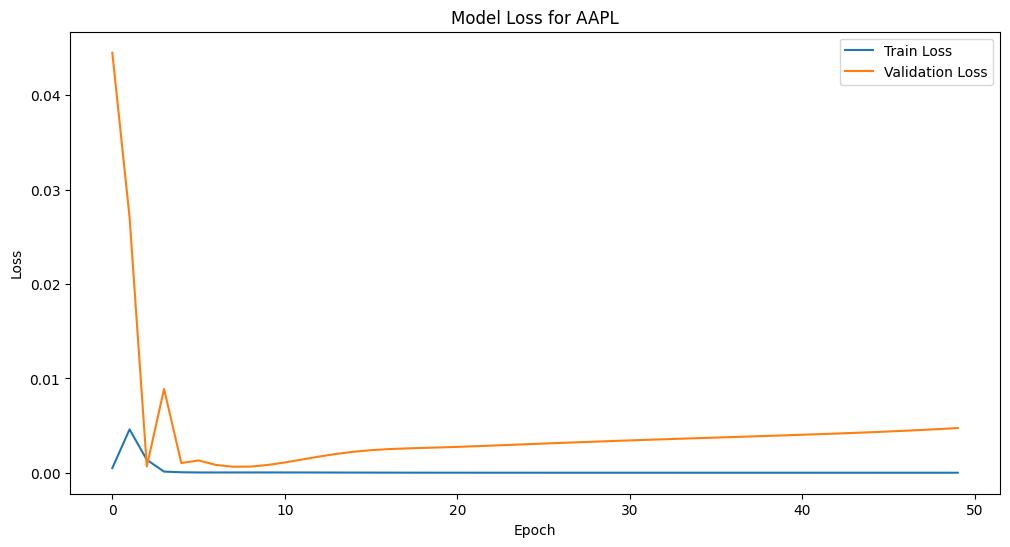

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X train shape = (2200, 20, 1)
X test shape = (944, 20, 1)
Y train shape = (2200,)
Y test shape = (944,)
Epoch 1/50
31/31 [==============================] - 3s 21ms/step - loss: 8.7129e-05 - val_loss: 0.1042
Epoch 2/50
31/31 [==============================] - 0s 7ms/step - loss: 4.2825e-04 - val_loss: 0.0451
Epoch 3/50
31/31 [==============================] - 0s 7ms/step - loss: 3.2342e-04 - val_loss: 0.0351
Epoch 4/50
31/31 [==============================] - 0s 6ms/step - loss: 2.3992e-04 - val_loss: 0.0184
Epoch 5/50
31/31 [==============================] - 0s 6ms/step - loss: 1.1405e-04 - val_loss: 0.0085
Epoch 6/50
31/31 [==============================] - 0s 7ms/step - loss: 3.6144e-05 - val_loss: 0.0076
Epoch 7/50
31/31 [==============================] - 0s 7ms/step - loss: 1.4418e-05 - val_loss: 0.0096
Epoch 8/50
31/31 [==============================] - 0s 6ms/step - loss: 1.2993e-05 - val_loss: 0.0107
Epoch 9/50
31/31 [==============================] - 0s 7ms/step - loss: 1.2904e

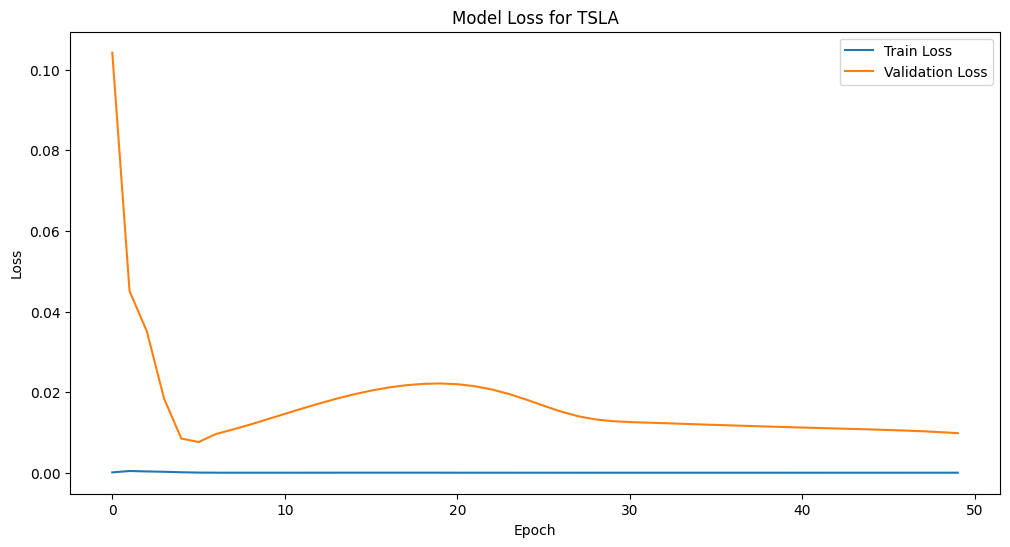

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X train shape = (2275, 20, 1)
X test shape = (976, 20, 1)
Y train shape = (2275,)
Y test shape = (976,)
Epoch 1/50
32/32 [==============================] - 3s 26ms/step - loss: 0.0012 - val_loss: 0.0167
Epoch 2/50
32/32 [==============================] - 0s 6ms/step - loss: 0.0126 - val_loss: 0.0241
Epoch 3/50
32/32 [==============================] - 0s 7ms/step - loss: 8.0322e-04 - val_loss: 0.0011
Epoch 4/50
32/32 [==============================] - 0s 5ms/step - loss: 2.0678e-04 - val_loss: 0.0013
Epoch 5/50
32/32 [==============================] - 0s 5ms/step - loss: 1.6317e-04 - val_loss: 0.0012
Epoch 6/50
32/32 [==============================] - 0s 7ms/step - loss: 1.4692e-04 - val_loss: 0.0011
Epoch 7/50
32/32 [==============================] - 0s 6ms/step - loss: 1.6614e-04 - val_loss: 0.0011
Epoch 8/50
32/32 [==============================] - 0s 6ms/step - loss: 1.2045e-04 - val_loss: 0.0011
Epoch 9/50
32/32 [==============================] - 0s 6ms/step - loss: 1.3723e-04 - va

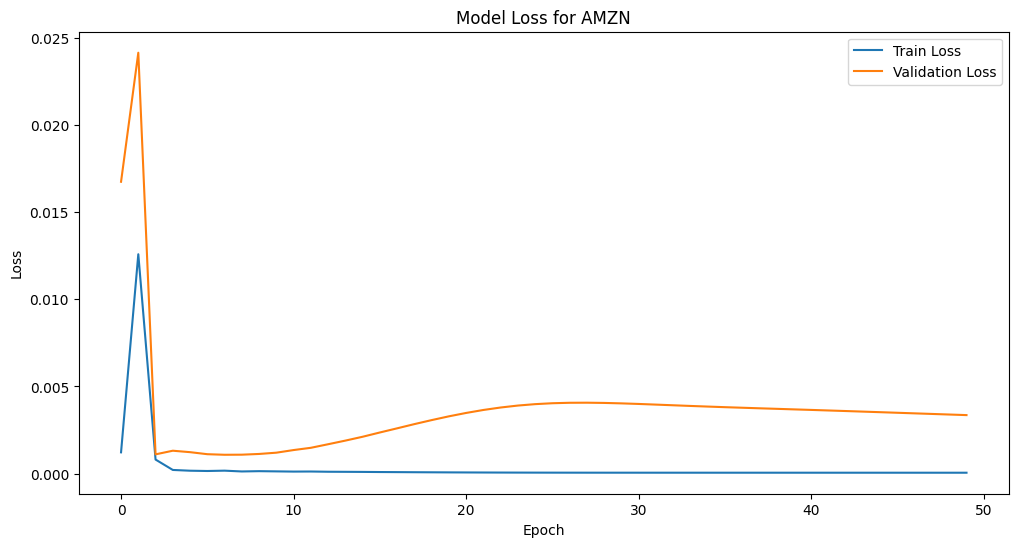

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Available stock in our dataset
tickers = ['AAPL', 'TSLA', 'AMZN']

# Building the model for each stock
for ticker in tickers:
  build_model(ticker, data)

##**Test Data**

Loading up the test data to evaluate the performance of the model

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import load_model

In [ ]:
val_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projects/Stock Forcast/Validation_data.csv", index_col='Date', parse_dates=True)

val_data

,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2023-01-25,140.889999,142.429993,138.809998,141.860001,140.700851,65799300,AAPL
2023-01-26,143.169998,144.250000,141.899994,143.960007,142.783707,54105100,AAPL
2023-01-27,143.160004,147.229996,143.080002,145.929993,144.737595,70555800,AAPL
2023-01-30,144.960007,145.550003,142.850006,143.000000,141.831543,64015300,AAPL
2023-01-31,142.699997,144.339996,142.279999,144.289993,143.110977,65874500,AAPL
...,...,...,...,...,...,...,...
2024-01-17,151.490005,152.149994,149.910004,151.710007,151.710007,34953400,AMZN
2024-01-18,152.770004,153.779999,151.820007,153.500000,153.500000,37850200,AMZN
2024-01-19,153.830002,155.759995,152.740005,155.339996,155.339996,51033700,AMZN


In [ ]:
# preprocessing the test data for evaluation

def test_data_prepare(ticker, val_data, model):
  val_data = val_data[val_data['Ticker']== ticker]

  # Select the 'Close' column for predictions
  new_close_prices = val_data[['Close']].values

  # Load the scaler used during training
  scaler = MinMaxScaler(feature_range=(0, 1))

  # Scale the new data
  scaled_new_close_prices = scaler.fit_transform(new_close_prices)

    # Prepare new data for predictions (assuming sequence length of 60)
  sequence_length = 20
  X_new = []

  for i in range(sequence_length, len(scaled_new_close_prices)):
      X_new.append(scaled_new_close_prices[i-sequence_length:i, 0])

  X_new = np.array(X_new)

  # Reshape the data to match the model input
  X_new = np.reshape(X_new, (X_new.shape[0], X_new.shape[1], 1))

  # return X_new

  # Make predictions
  predicted_scaled_prices = model.predict(X_new)

  # Inverse transform to get actual price predictions
  predicted_prices = scaler.inverse_transform(predicted_scaled_prices)

  actual_prices = new_close_prices[sequence_length:]

  # Create a DataFrame to compare actual vs. predicted prices
  predictions_df = pd.DataFrame({'Actual': actual_prices.flatten(), 'Predicted': predicted_prices.flatten()})

  return predictions_df




In [ ]:
# function to give a visual representation of predictions

def plot_graph(ticker, dataframe):
    # Plot the results
  plt.figure(figsize=(14, 7))
  plt.plot(dataframe['Actual'], color='blue', label='Actual Prices')
  plt.plot(dataframe['Predicted'], color='red', label='Predicted Prices')
  plt.title(f'{ticker} Stock Price Prediction')
  plt.xlabel('Time')
  plt.ylabel('Stock Price')
  plt.legend()
  plt.show()

In [ ]:
# loading up models built initially
aapl_model = load_model('/content/drive/MyDrive/Colab Notebooks/Projects/Stock Forcast/models/AAPL_model.h5')
amzn_model = load_model('/content/drive/MyDrive/Colab Notebooks/Projects/Stock Forcast/models/AMZN_model.h5')
tsla_model = load_model('/content/drive/MyDrive/Colab Notebooks/Projects/Stock Forcast/models/TSLA_model.h5')

### **AAPL Stock**

In [ ]:
aapl = test_data_prepare('AAPL',val_data, aapl_model)

aapl

8/8 [==============================] - 1s 3ms/step


,Actual,Predicted
0,149.399994,152.164871
1,146.710007,151.769638
2,147.919998,151.019760
3,147.410004,150.491684
4,145.309998,149.926163
...,...,...
225,182.679993,180.998154
226,188.630005,180.603546
227,191.559998,181.158234
228,193.889999,181.997772


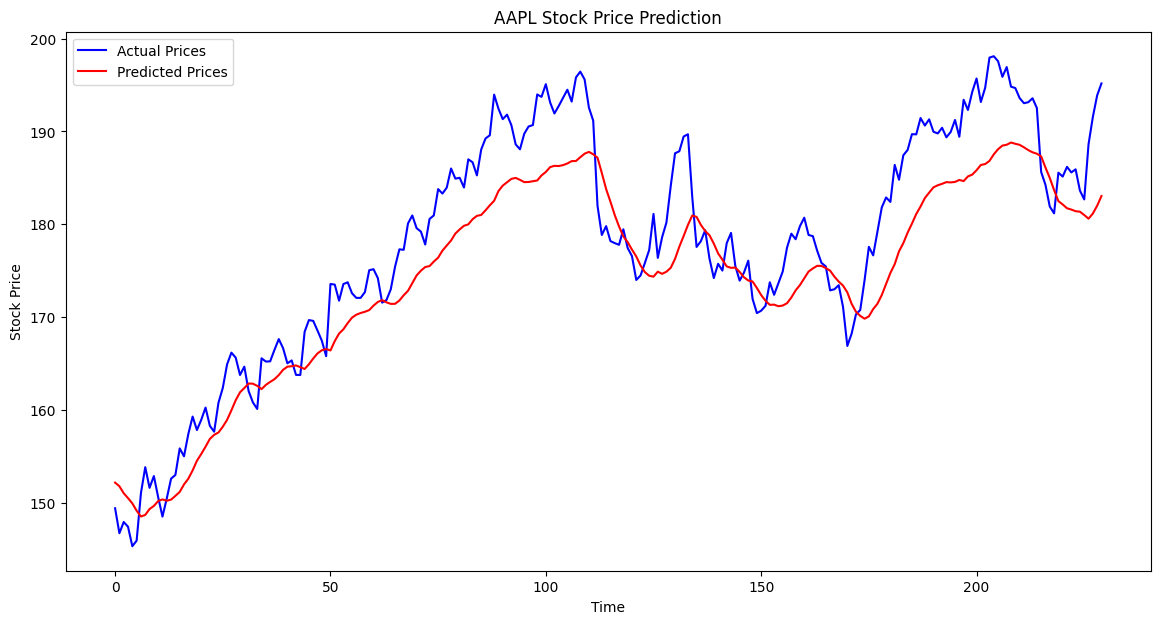

In [ ]:
plot_graph('AAPL', aapl)

### **TSLA Stock**

In [ ]:
tsla = test_data_prepare('TSLA', val_data, tsla_model)

tsla

8/8 [==============================] - 1s 3ms/step


,Actual,Predicted
0,202.070007,195.703201
1,196.880005,195.652954
2,207.630005,194.760376
3,205.710007,195.731461
4,202.770004,196.331329
...,...,...
225,215.550003,215.142792
226,211.880005,212.805908
227,212.190002,210.386780
228,208.800003,208.514877


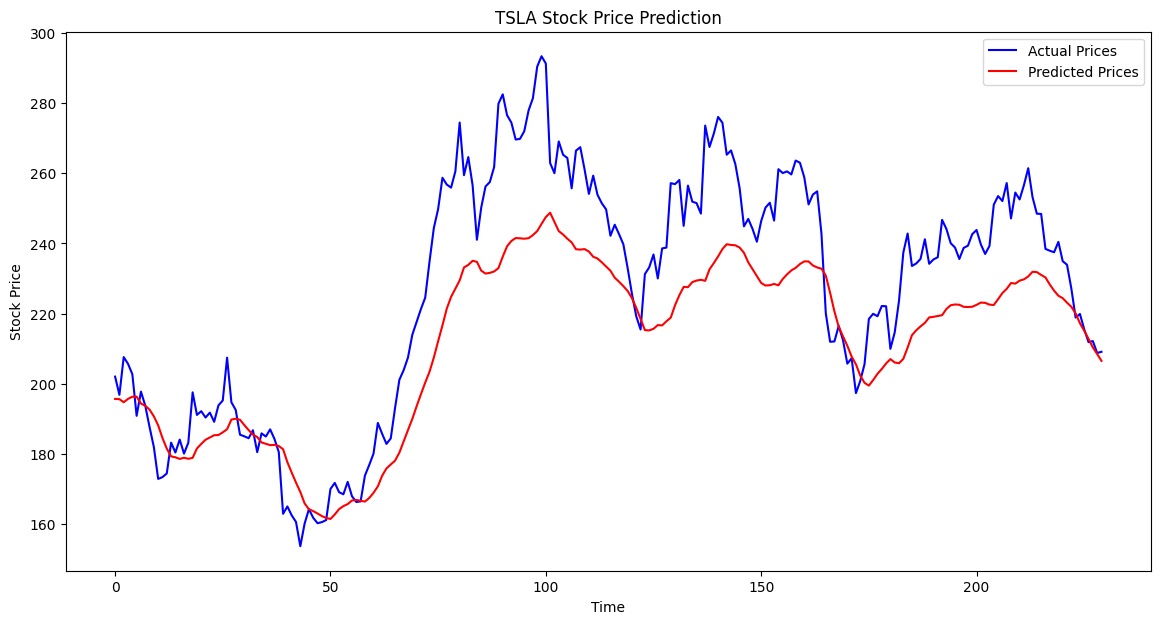

In [ ]:
plot_graph('TSLA', tsla)

### **AMZN Stock**

In [ ]:
amzn = test_data_prepare('AMZN', val_data, amzn_model)

amzn

8/8 [==============================] - 1s 4ms/step


,Actual,Predicted
0,95.820000,98.571236
1,93.500000,98.098686
2,93.760002,97.328270
3,94.230003,96.706184
4,92.169998,96.252670
...,...,...
225,151.710007,145.852814
226,153.500000,145.800354
227,155.339996,146.024353
228,154.779999,146.422211


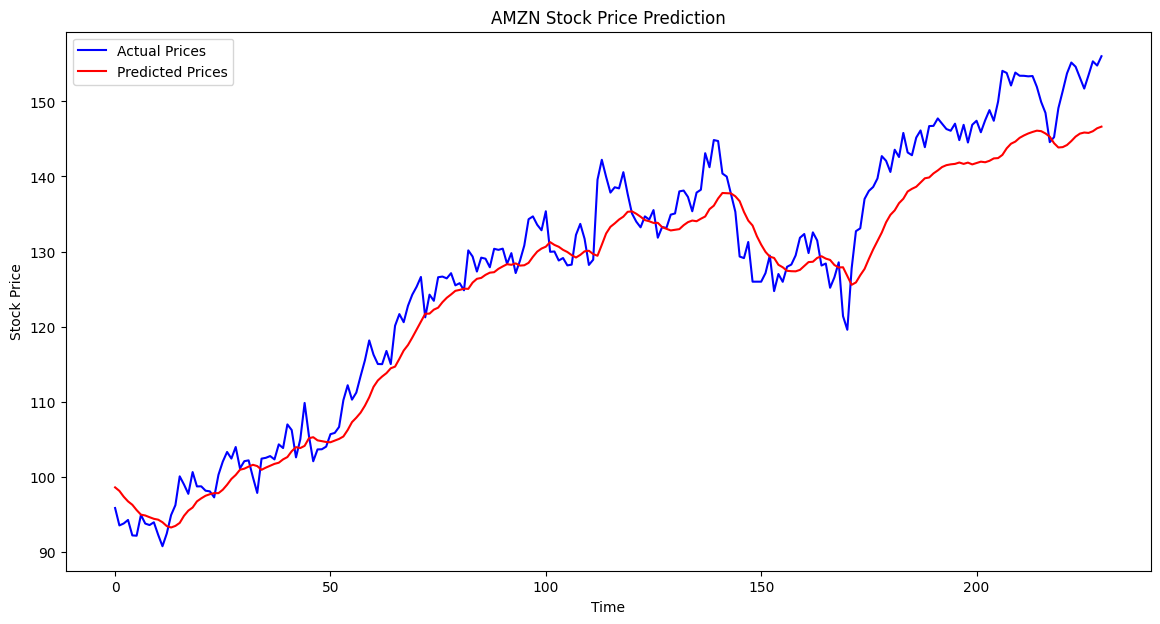

In [ ]:
plot_graph('AMZN', amzn)